# Exporatory Data Analysis : Haberman's Dataset

By<br>
***Kranthi Kumar Valaboju***

Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.

In [1]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Loading the Haberman Data into a pandas DataFrame and adding the column names
# 'Age_of_Patient','Operation_Year','Axil_Nodes','Survival_Status'

haberman_data=pd.read_csv("haberman.csv",header=None, names=['Age_of_Patient','Operation_Year','Axil_Nodes','Survival_Status'])


In [2]:
# Printing the number of data points

print(haberman_data.shape)


(306, 4)


#### Observation : 

This dataset contains 306 data points (rows) with 3 variables and 1 Cross Label

In [3]:
# Printing the column names in Haberman Dataset

print(haberman_data.columns)


Index(['Age_of_Patient', 'Operation_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')


#### Observation :

The 4 Columns including Cross Label are

- Age_of_Patient : Age of the Patient
- Operation_Year
- Axil_Nodes : Number of Axil Nodes that are detected
- Survival_Status : Survival Status of the patient after 5 years

In [4]:
# Replacing the Survival_Status Values

haberman_data['Survival_Status']=haberman_data['Survival_Status'].replace([1,2],['yes','no'])
print("Survival Status Count of Patients:")
print(haberman_data['Survival_Status'].value_counts())

Survival Status Count of Patients:
yes    225
no      81
Name: Survival_Status, dtype: int64


#### Observation : 

 - Haberman's Dataset is an Imbalanced dataset as the number of datapoints for each class are different.
 - 73.5 % of the patients have survived after the surgery.

In [5]:
haberman_data.describe()

,Age_of_Patient,Operation_Year,Axil_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


#### Observation : 

- The Age of the patients is in the range of 30 to 83.
- The data collected is from the period 58 - 69.
- The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.

## Univariate Analysis :

### Histogram

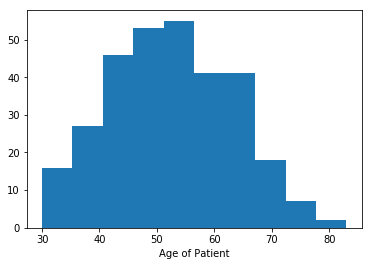

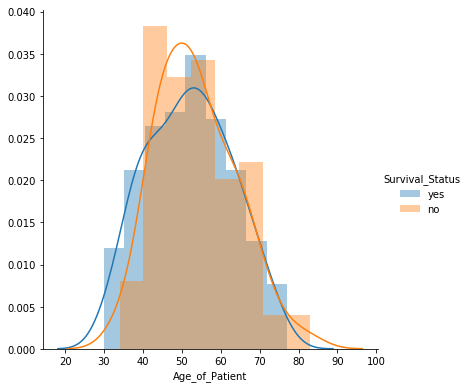

In [6]:
# Plotting the Histogram for Age of Patient directly and also  based on Cross Label i.e. Survival Status

plt.hist(haberman_data["Age_of_Patient"])
plt.xlabel("Age of Patient")

sb.FacetGrid(haberman_data,hue='Survival_Status',height=5.5).map(sb.distplot,"Age_of_Patient").add_legend()
plt.show()

#### Observation :

- There are more number of patients aged between 45 to 55 years.
- Exact inferences can't be drawn from the above histogram's. But, Patients aged between 30-40 had more survival chances. And this is not the, only parameter that has to be considered. The combination of Age and Number of Axil Nodes can infer better.

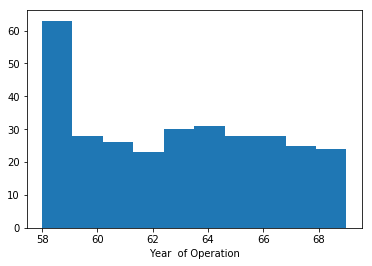

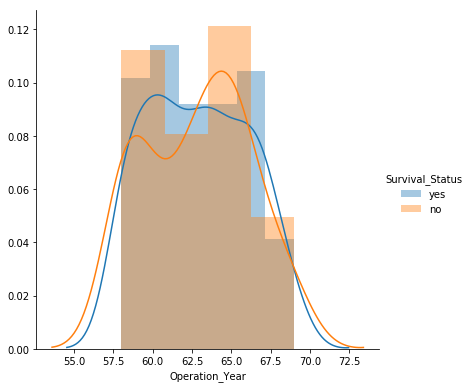

In [7]:
# Plotting the Histogram for Operation Year directly and also  based on Cross Label i.e. Survival Status

plt.hist(haberman_data["Operation_Year"])
plt.xlabel("Year  of Operation")

sb.FacetGrid(haberman_data,hue="Survival_Status",height=5.5).map(sb.distplot,"Operation_Year").add_legend()
plt.show()

#### Observation :

- Exact inferences can' be obtained as the Histogram's are overlapped. 
- More Number of surgeries were done in period 58-59.
- Success rate was high during the period 60-61. Even the number of Axil Nodes detected and the age of the patient also has influence on survival rate.

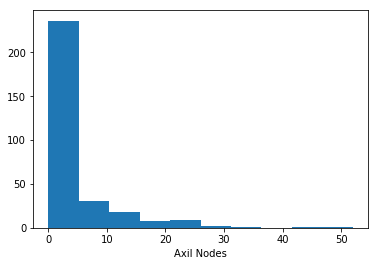

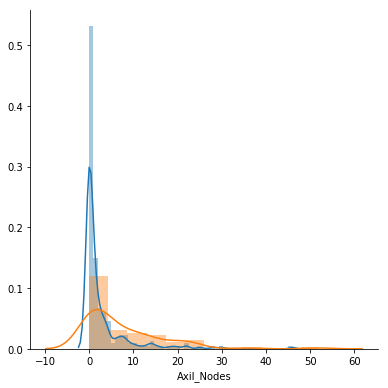

In [8]:
# Plotting the Histogram for Axil_Nodes directly and also  based on Cross Label i.e. Survival Status

plt.hist(haberman_data["Axil_Nodes"])
plt.xlabel("Axil Nodes")

sb.FacetGrid(haberman_data,hue="Survival_Status",height=5.5).map(sb.distplot,"Axil_Nodes")
plt.show()

#### Observation : 

- Most of the patients do have less than 5 Positively Detected Axil Nodes.
- Patients having less than 5 Axil Nodes have the highest Survival Rate. 

### PDF, CDF

In [9]:
# Segregating the data based on the Class Label i.e. Survival Status

haberman_data_Survived=haberman_data.loc[haberman_data["Survival_Status"]=="yes"]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["Survival_Status"]=="no"]


Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


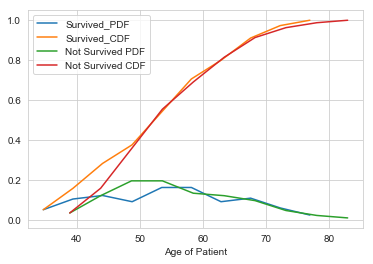

In [37]:
# Plotting the PDF,CDF for Age of Patient for the above Segregated Data

density_age_survived,bin_edges_age_survived=np.histogram(haberman_data_Survived['Age_of_Patient'],bins=10,density=True)
pdf_age_survived=(density_age_survived)/(sum(density_age_survived))


density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(haberman_data_Not_Survived['Age_of_Patient'],bins=10,density=True)
pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

print("Bin Edges Survived : {}".format(bin_edges_age_survived))
print("PDF Survived : {}".format(pdf_age_survived))
print("Bin Edges Not Survived :{}".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}".format(pdf_Age_Not_Survived))


cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])
plt.show()



#### Observation : 
 - The Survival chances are high for the patients having age less than 40 years.

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


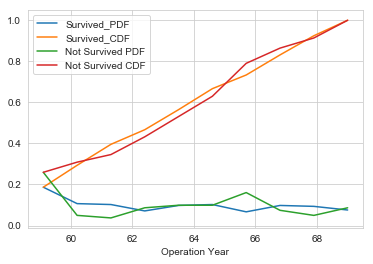

In [69]:
# Plotting the PDF,CDF for Year of Operation for the above Segregated Data

density_op_year_survived,bin_edges_op_year_survived=np.histogram(haberman_data_Survived['Operation_Year'],bins=10,density=True)
pdf_op_year_survived=(density_op_year_survived)/(sum(density_op_year_survived))

density_Op_Year_Not_Survived,bin_Edges_Op_Year_Not_Survived=np.histogram(haberman_data_Not_Survived['Operation_Year'],bins=10,density=True)
pdf_Op_Year_Not_Survived=(density_Op_Year_Not_Survived)/(sum(density_Op_Year_Not_Survived))

print("Bin Edges Survived : {}".format(bin_edges_op_year_survived))
print("PDF Survived : {}".format(pdf_op_year_survived))
print("Bin Edges Not Survived :{}".format(bin_Edges_Op_Year_Not_Survived))
print("PDF Not Survived : {}".format(pdf_Op_Year_Not_Survived))

cdf_op_year_survived=np.cumsum(pdf_op_year_survived)
cdf_Op_Year_Not_Survived=np.cumsum(pdf_Op_Year_Not_Survived)


plt.plot(bin_edges_op_year_survived[1:],pdf_op_year_survived)
plt.plot(bin_edges_op_year_survived[1:],cdf_op_year_survived)
plt.plot(bin_Edges_Op_Year_Not_Survived[1:],pdf_Op_Year_Not_Survived)
plt.plot(bin_Edges_Op_Year_Not_Survived[1:],cdf_Op_Year_Not_Survived)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])
plt.show()

#### Observation : 
 - As the plots are overlapped, exact inferences can't be drawn out. And this parameter alone can't be used for obtaining the inference. 

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


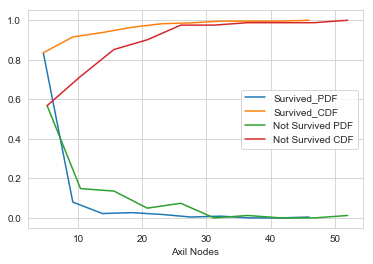

In [70]:
# Plotting the PDF,CDF for Axil Nodes for the above Segregated Data

density_axil_nodes_survived,bin_edges_axil_nodes_survived=np.histogram(haberman_data_Survived['Axil_Nodes'],bins=10,density=True)
pdf_axil_nodes_survived=(density_axil_nodes_survived)/(sum(density_axil_nodes_survived))

density_Axil_Nodes_Not_Survived,bin_Edges_Axil_Nodes_Not_Survived=np.histogram(haberman_data_Not_Survived['Axil_Nodes'],bins=10,density=True)
pdf_Axil_Nodes_Not_Survived=(density_Axil_Nodes_Not_Survived)/(sum(density_Axil_Nodes_Not_Survived))

print("Bin Edges Survived : {}".format(bin_edges_axil_nodes_survived))
print("PDF Survived : {}".format(pdf_axil_nodes_survived))
print("Bin Edges Not Survived :{}".format(bin_Edges_Axil_Nodes_Not_Survived))
print("PDF Not Survived : {}".format(pdf_Axil_Nodes_Not_Survived))



cdf_axil_nodes_survived=np.cumsum(pdf_axil_nodes_survived)
cdf_Axil_Nodes_Not_Survived=np.cumsum(pdf_Axil_Nodes_Not_Survived)


plt.plot(bin_edges_axil_nodes_survived[1:],pdf_axil_nodes_survived)
plt.plot(bin_edges_axil_nodes_survived[1:],cdf_axil_nodes_survived)
plt.plot(bin_Edges_Axil_Nodes_Not_Survived[1:],pdf_Axil_Nodes_Not_Survived)
plt.plot(bin_Edges_Axil_Nodes_Not_Survived[1:],cdf_Axil_Nodes_Not_Survived)
plt.xlabel('Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])
plt.show()

#### Observation : 
 - The Survival Rate for the patients having less than 5 auxilary nodes is high i.e. ~82%.
 - If the number of axil nodes are less, then the survival chances are high.

### Box Plots

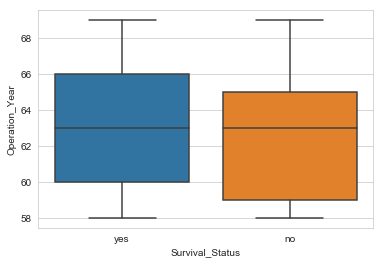

In [21]:
sb.boxplot(x="Survival_Status",y="Operation_Year",data=haberman_data)
plt.show()

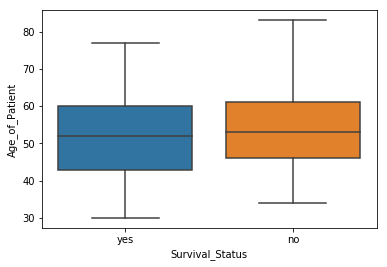

In [14]:
sb.boxplot(x="Survival_Status",y="Age_of_Patient",data=haberman_data)
plt.show()

#### Observation :
- This parameter alone can't be used for obtaining the inference but from Box Plot we can infer that,
- Patients aged between 30 and 35 survived.
- Patients whose age is less than 45 have more chances of survival.

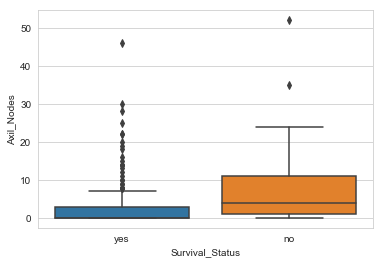

In [22]:
sb.boxplot(x="Survival_Status",y="Axil_Nodes",data=haberman_data)
plt.show()

#### Observation :
 - The Lesser the number of axil nodes, the more the chance of survival.
 - More than 60% of the patients survived are having less than 5 axil nodes.

### Violin Plots 

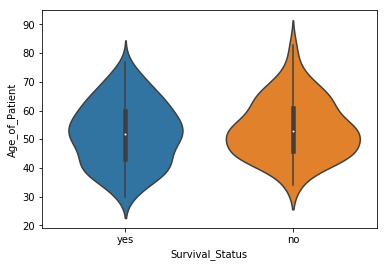

In [16]:
sb.violinplot(x="Survival_Status",y="Age_of_Patient",data=haberman_data)
plt.show()

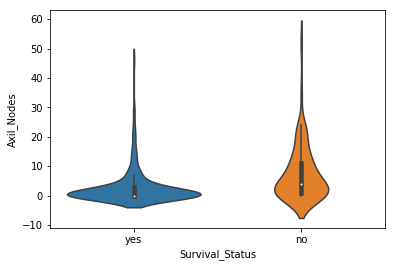

In [17]:
sb.violinplot(x="Survival_Status",y="Axil_Nodes",data=haberman_data)
plt.show()

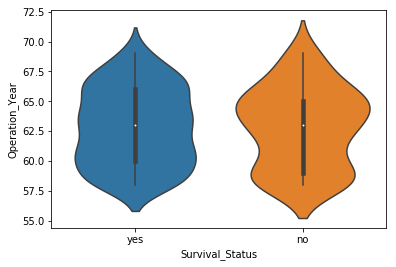

In [18]:
sb.violinplot(x="Survival_Status",y="Operation_Year",data=haberman_data)
plt.show()

#### Observation :
- Violin plots are the combination of Box Plots and Distribution Functions. So, the same inferences can be obtained.

### Bivariate  Analysis

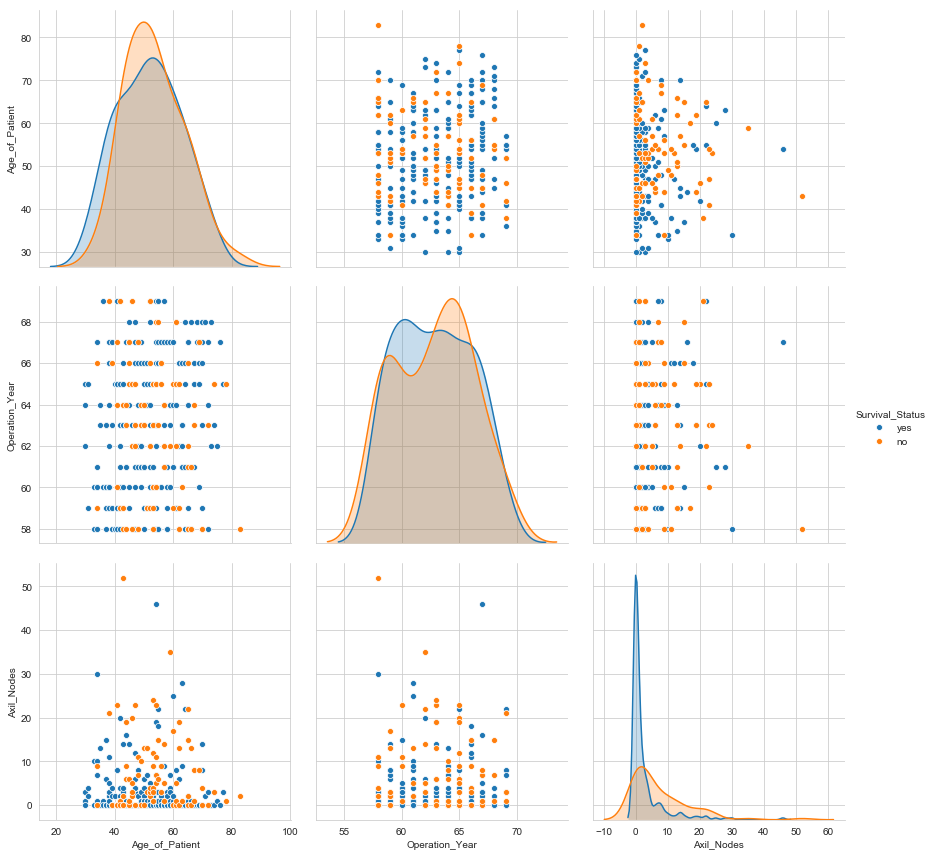

In [20]:
sb.pairplot(haberman_data,hue="Survival_Status",height=4)
plt.show()

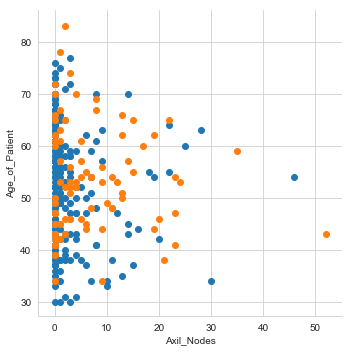

In [24]:
sb.set_style('whitegrid')
sb.FacetGrid(haberman_data,hue='Survival_Status',height=5).map(plt.scatter,'Axil_Nodes','Age_of_Patient')
plt.show()

#### Observation :
 - All the plots are overlapped.
 - From the plot between Age_of_Patient and Axil_Nodes, We can infer that there are more number of patients with number of axil nodes less than 5 as the scattered plot is most densely concentrated in that region.

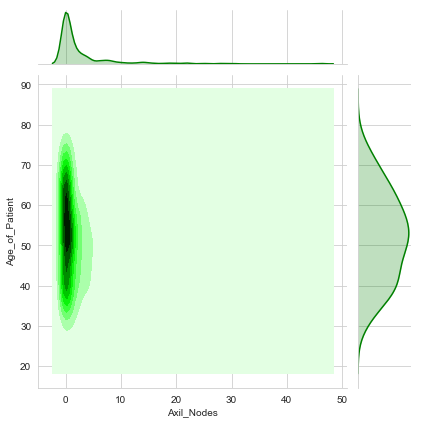

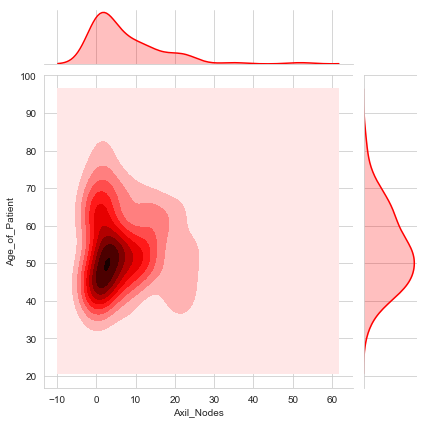

In [68]:

sb.jointplot(x="Axil_Nodes",y="Age_of_Patient",data=haberman_data_Survived,kind="kde",color='g')
sb.jointplot(x="Axil_Nodes",y="Age_of_Patient",data=haberman_data_Not_Survived,kind="kde",color='r')
plt.show()


#### Observation :
 - From the above plots we can conclude that, the lesser the number of axil nodes, the chances of survival are high.
 - Survived patients have less number of axil nodes i.e. less than 5.
 - So, the number of Axil Nodes is the important parameter in determining the Survival Status of the Patient.

### Final Conclusions : 

 - Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
 - Age of patients is in the range of 30 to 83.
 - Operation's are performed during the period 1958-1969.
 - The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
 - Patients aged between 40 and 55 are more in number.
 - Patients with age less than 40 years have more chances of survival.
 - Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
 - Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
 - Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
 - Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.